# Modulation Classification

Developing AutoML Model for AWGN Channel for Modulation Classification. SNR Ratio's(in dB) of Channel are $[-15,-10,-5,0,5,10,15,20,25,30]$.

**Data Generation:**
Data is generated using MatLab's Communication Toolbox for Modulation Schemes QPSK, 16-QAM, 64-QAM for SNR Ratio's (in dB) $[-15,-10,-5,0,5,10,15,20,25,30]$ when signal is transmitted through Channels AWGN and Rayleigh Channels.

**Modulation Classification:**
We will use AutoML to create a classifer that predicts Modulation Scheme depending on In-Phase and Quadrature-Phase Components at the Receiver's End.

## Imports

### Importing Data

Files are uploaded in Google Drive. Notebook is connected to Google Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Modulation-Classification/Synthetic\ Datasets/AutoML

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Modulation-Classification/Synthetic Datasets/AutoML


### Importing Libraries

We will be using AutoKeras for generating AutoML Models.
Source of Documentation: [https://autokeras.com/](https://autokeras.com/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import seaborn as sns
import scipy.io
import os
from sklearn.model_selection import train_test_split

# Importing Preprocessing Libraries
from Import_Functions import ImportData, ImportDatasets
from Plot_Results import EvaluateData, PlotResults

# AutoML Libraries
!pip3 install autokeras
import autokeras as ak

# Tensorflow Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input
from tensorflow.keras.models import Model

## Importing Data

Importing Data for all Models

In [3]:
Data = {}

# For AWGN Channel
## MLP Model
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('AWGN')
Data['AWGN_MLP'] = (X_Train, y_Train, X_Valid, y_Valid)

## CNN Model
X_train, y_train, X_valid, y_valid = np.copy(X_Train),np.copy(y_Train), X_Valid.copy(), y_Valid.copy()
X_train = X_train.reshape(-1,100,2)
y_train = y_train[::100]
for snr in [-15,-10,-5,0,5,10,15,20,25,30]:
    X_valid[snr] = X_valid[snr].reshape(-1,100,2)
    y_valid[snr] = y_valid[snr][::100]
Data['AWGN_CNN'] = (X_train, y_train, X_valid, y_valid)

# For Rayleigh Channel, L=2
Data['Rayleigh_L=2'] = ImportDatasets('Rayleigh', L=2)

# For Rayleigh Channel, L=3
Data['Rayleigh_L=3'] = ImportDatasets('Rayleigh', L=3)

## AutoML MLP Model for AWGN Channel

For AWGN Channel, Input Dimensions is $(2,)$

### Importing Data and Creating Classifier

Importing Data

In [4]:
X_Train, y_Train, X_Valid, y_Valid = Data['AWGN_MLP']

Creating a Classifier

In [5]:
AWGNClassifier = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=3,
    loss='categorical_crossentropy',
    num_classes=3)

AWGNClassifier.fit(X_Train, y_Train, epochs=15, batch_size=256, validation_split=0.1)

Trial 3 Complete [00h 00m 44s]
val_accuracy: 0.8347973227500916

Best val_accuracy So Far: 0.8939611315727234
Total elapsed time: 00h 02m 12s
INFO:tensorflow:Oracle triggered exit
Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 1.0824 - accuracy: 0.3570
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.8293 - accuracy: 0.6655
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.9090 - accuracy: 0.6630
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.9507 - accuracy: 0.6580
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.9631 - accuracy: 0.6534
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.9620 - accuracy: 0.6495
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 0.9585 - accuracy: 0.6469
Epoch 8/15
938/938 [==============================] - 3s 3ms/step - loss: 0.9556 - accuracy: 0.6451
Epoch 9/15
938/938 [

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 2)                 0         
_________________________________________________________________
normalization (Normalization (None, 2)                 5         
_________________________________________________________________
dense (Dense)                (None, 32)                96        
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

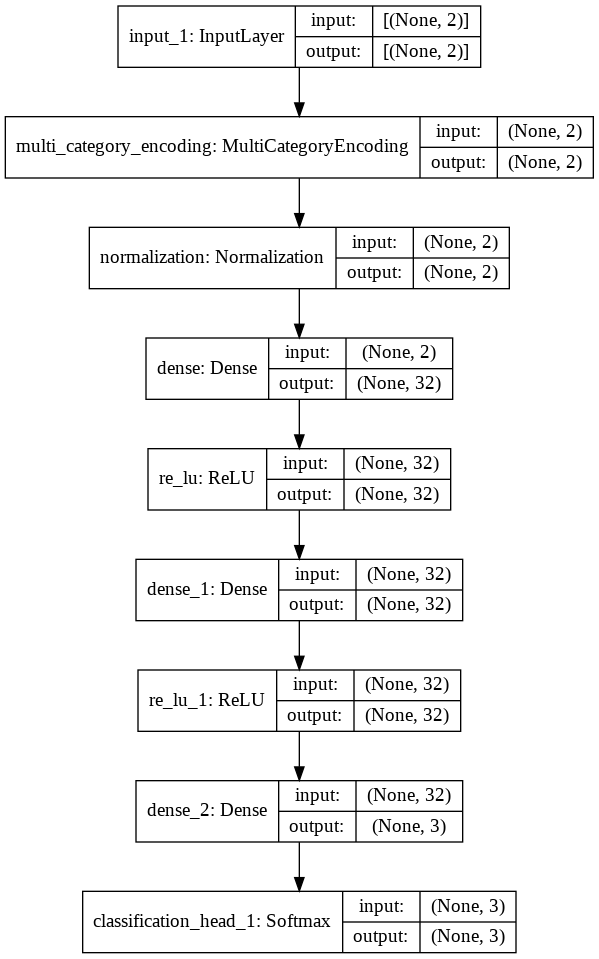

In [6]:
AWGN_Model = AWGNClassifier.export_model()
AWGN_Model.summary()
tf.keras.utils.plot_model(AWGN_Model, to_file='../Models/AWGN_Model_MLP.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [7]:
AWGN_Model.fit(X_Train, y_Train, epochs=100, batch_size=512, validation_split=0.1,shuffle=True)

Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 0.7497 - accuracy: 0.6919 - val_loss: 0.5929 - val_accuracy: 0.8087
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7293 - accuracy: 0.6939 - val_loss: 0.5610 - val_accuracy: 0.8238
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7240 - accuracy: 0.6947 - val_loss: 0.5470 - val_accuracy: 0.8305
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7182 - accuracy: 0.6954 - val_loss: 0.5246 - val_accuracy: 0.8348
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7129 - accuracy: 0.6953 - val_loss: 0.5133 - val_accuracy: 0.8315
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7095 - accuracy: 0.6956 - val_loss: 0.5049 - val_accuracy: 0.8310
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7071 - accuracy: 0.6956 - val_loss: 0.4885 - val_accuracy: 0.8311

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3881666660308838
SNR: -10 Accuracy: 0.4833333194255829
SNR: -5 Accuracy: 0.6256666779518127
SNR: 0 Accuracy: 0.7151666879653931
SNR: 5 Accuracy: 0.7723333239555359
SNR: 10 Accuracy: 0.8134999871253967
SNR: 15 Accuracy: 0.8243333101272583
SNR: 20 Accuracy: 0.8264999985694885
SNR: 25 Accuracy: 0.8330000042915344
SNR: 30 Accuracy: 0.8330000042915344


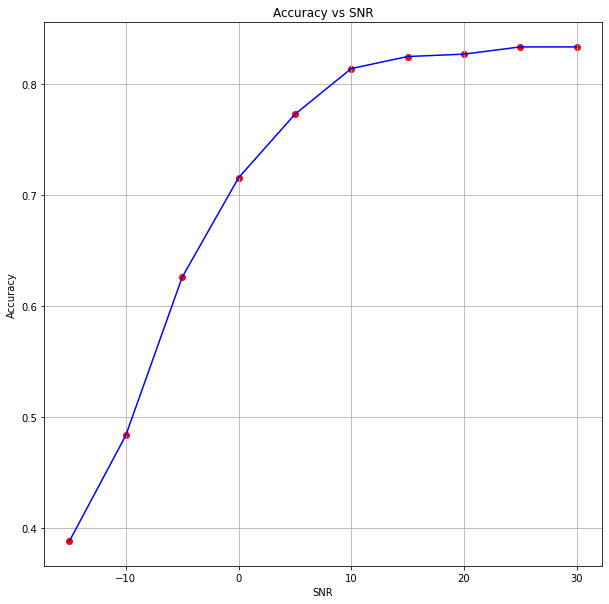

In [8]:
EvaluateData(AWGN_Model, X_Valid, y_Valid, "../Results/AWGN_Accuracy_MLP.jpg")

Save Model

In [9]:
AWGN_Model.save("../Models/AWGN_MLP.h5")

## AutoML CNN Model for AWGN Channel

For AWGN Channel, Input Dimensions is $(100,2)$

### Importing Data and Creating Classifier

Importing Data

In [10]:
X_Train, y_Train, X_Valid, y_Valid = Data['AWGN_CNN']

Creating a Classifier

In [11]:
AWGNClassifier = ak.ImageClassifier(
    overwrite=True,
    max_trials=1,
    loss='categorical_crossentropy',
    num_classes=3)

AWGNClassifier.fit(X_Train, y_Train, epochs=15, batch_size=256, validation_split=0.1)

Trial 1 Complete [00h 00m 06s]
val_loss: 0.9836425185203552

Best val_loss So Far: 0.9836425185203552
Total elapsed time: 00h 00m 06s
INFO:tensorflow:Oracle triggered exit
Epoch 1/15
10/10 [==============================] - 1s 29ms/step - loss: 1.0143 - accuracy: 0.3397
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 1.2520 - accuracy: 0.3835
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 0.9963 - accuracy: 0.4631
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: 0.9464 - accuracy: 0.5068
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 0.9639 - accuracy: 0.5678
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 0.9203 - accuracy: 0.6145
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: 0.9194 - accuracy: 0.6429
Epoch 8/15
10/10 [==============================] - 0s 7ms/step - loss: 0.9117 - accuracy: 0.6376
Epoch 9/15
10/10 [=========================

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 100, 2, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 100, 2, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 2, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 2, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 1, 64)         0     

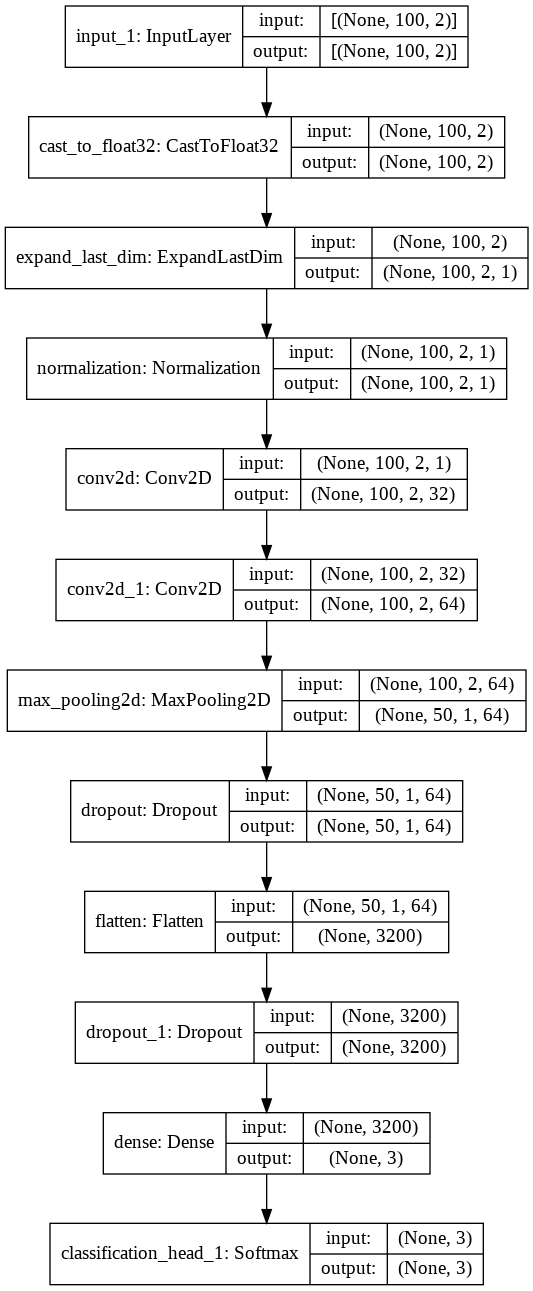

In [12]:
AWGN_Model = AWGNClassifier.export_model()
AWGN_Model.summary()
tf.keras.utils.plot_model(AWGN_Model, to_file='../Models/AWGN_Model_CNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model



In [13]:
AWGN_Model.fit(X_Train, y_Train, epochs=40, batch_size=256, validation_split=0.1,shuffle=True)

Epoch 1/40
9/9 [==============================] - 1s 95ms/step - loss: 0.5912 - accuracy: 0.7718 - val_loss: 0.4699 - val_accuracy: 0.9750
Epoch 2/40
9/9 [==============================] - 0s 9ms/step - loss: 0.5693 - accuracy: 0.7977 - val_loss: 0.4694 - val_accuracy: 0.9167
Epoch 3/40
9/9 [==============================] - 0s 9ms/step - loss: 0.5483 - accuracy: 0.8065 - val_loss: 0.4513 - val_accuracy: 0.9042
Epoch 4/40
9/9 [==============================] - 0s 9ms/step - loss: 0.5245 - accuracy: 0.8120 - val_loss: 0.4094 - val_accuracy: 0.9708
Epoch 5/40
9/9 [==============================] - 0s 9ms/step - loss: 0.5077 - accuracy: 0.8176 - val_loss: 0.3880 - val_accuracy: 0.9708
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 0.4902 - accuracy: 0.8204 - val_loss: 0.3572 - val_accuracy: 0.9750
Epoch 7/40
9/9 [==============================] - 0s 8ms/step - loss: 0.4711 - accuracy: 0.8269 - val_loss: 0.3750 - val_accuracy: 0.9458
Epoch 8/40
9/9 [=================

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3333333432674408
SNR: -10 Accuracy: 0.3333333432674408
SNR: -5 Accuracy: 0.8333333134651184
SNR: 0 Accuracy: 1.0
SNR: 5 Accuracy: 1.0
SNR: 10 Accuracy: 0.9833333492279053
SNR: 15 Accuracy: 0.9666666388511658
SNR: 20 Accuracy: 1.0
SNR: 25 Accuracy: 1.0
SNR: 30 Accuracy: 0.9833333492279053


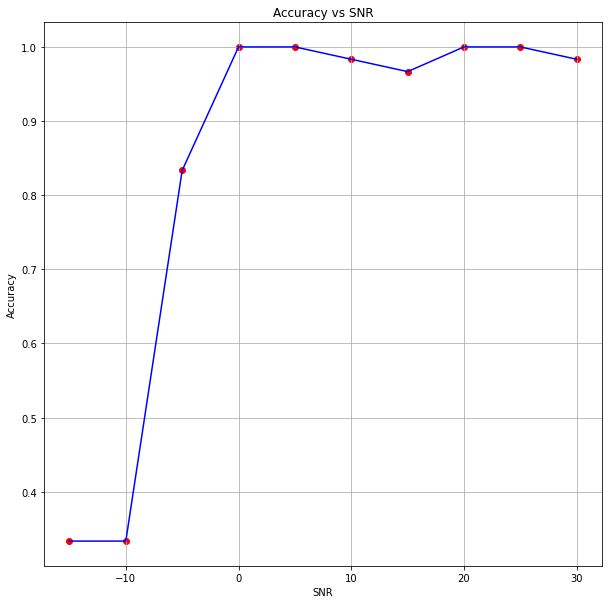

In [14]:
EvaluateData(AWGN_Model, X_Valid, y_Valid, "../Results/AWGN_Accuracy_CNN.jpg")

Save Model

In [15]:
AWGN_Model.save("../Models/AWGN_CNN.h5")

## AutoML CNN Model for Rayleigh Channel of Channel-Length = 2

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier

Importing Data

In [16]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=2']

Creating Classifier


In [17]:
RayleighClassifier = ak.ImageClassifier(
    overwrite=True,
    max_trials=1,
    loss='categorical_crossentropy',
    num_classes=3)

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=256, validation_split=0.1)

Trial 1 Complete [00h 00m 27s]
val_loss: 0.5553973913192749

Best val_loss So Far: 0.5553973913192749
Total elapsed time: 00h 00m 27s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
469/469 [==============================] - 7s 15ms/step - loss: 1.1652 - accuracy: 0.3720
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.9549 - accuracy: 0.7203
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.8011 - accuracy: 0.8226
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 1.2803 - accuracy: 0.7117
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.8930 - accuracy: 0.7431
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 100, 2, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 100, 2, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 2, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 2, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 1, 64)         0     

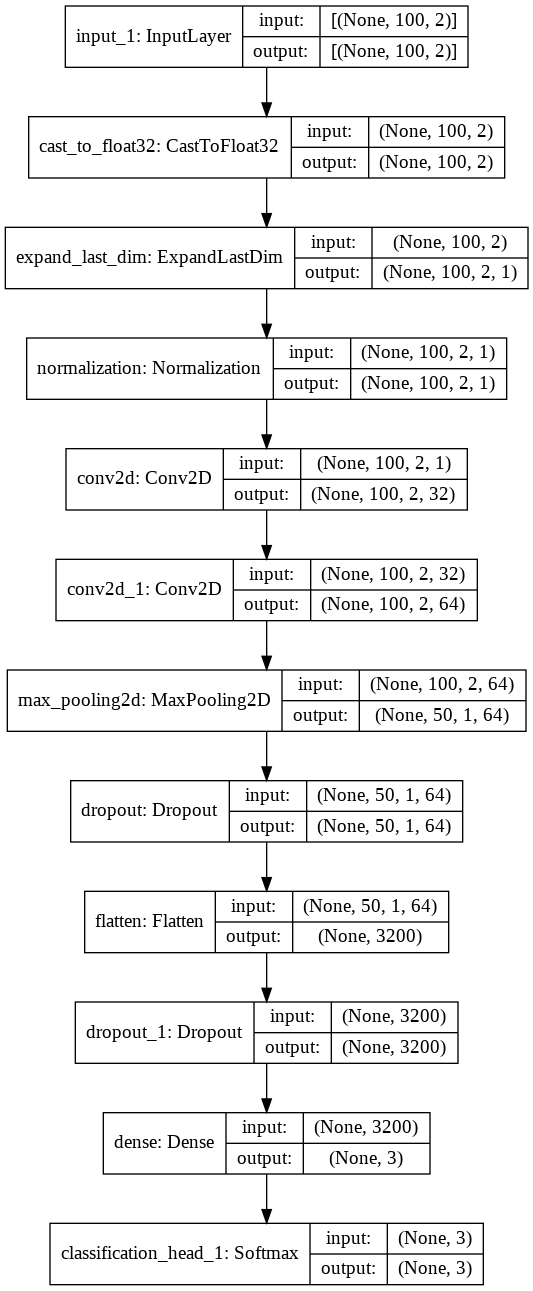

In [18]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=2_CNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [19]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 3s 7ms/step - loss: 0.2969 - accuracy: 0.9006 - val_loss: 0.0618 - val_accuracy: 0.9986
Epoch 2/25
375/375 [==============================] - 2s 6ms/step - loss: 0.1561 - accuracy: 0.9403 - val_loss: 0.0392 - val_accuracy: 0.9967
Epoch 3/25
375/375 [==============================] - 2s 6ms/step - loss: 0.1328 - accuracy: 0.9474 - val_loss: 0.0322 - val_accuracy: 0.9940
Epoch 4/25
375/375 [==============================] - 2s 6ms/step - loss: 0.1197 - accuracy: 0.9523 - val_loss: 0.0265 - val_accuracy: 0.9945
Epoch 5/25
375/375 [==============================] - 2s 6ms/step - loss: 0.1089 - accuracy: 0.9561 - val_loss: 0.0122 - val_accuracy: 0.9987
Epoch 6/25
375/375 [==============================] - 2s 6ms/step - loss: 0.1015 - accuracy: 0.9594 - val_loss: 0.0064 - val_accuracy: 0.9993
Epoch 7/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0970 - accuracy: 0.9610 - val_loss: 0.0037 - val_accuracy: 0.9996
Epoch 

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.8696666955947876
SNR: -10 Accuracy: 0.9663333296775818
SNR: -5 Accuracy: 0.9516666531562805
SNR: 0 Accuracy: 0.9926666617393494
SNR: 5 Accuracy: 0.9986666440963745
SNR: 10 Accuracy: 0.999666690826416
SNR: 15 Accuracy: 1.0
SNR: 20 Accuracy: 1.0
SNR: 25 Accuracy: 1.0
SNR: 30 Accuracy: 0.999666690826416


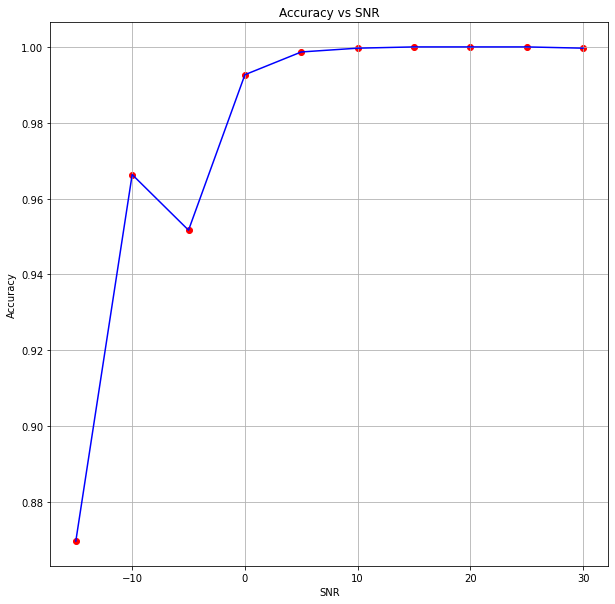

In [20]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=2_CNN.jpg")

Save Model

In [21]:
Rayleigh_Model.save("../Models/Rayleigh_L=2_CNN.h5")

## AutoML CNN Model for Rayleigh Channel of Channel-Length = 3

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier

Importing Data

In [22]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=3']

Creating Classifier


In [23]:
RayleighClassifier = ak.ImageClassifier(
    overwrite=True,
    max_trials=1,
    loss='categorical_crossentropy',
    num_classes=3)

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=256, validation_split=0.1)

Trial 1 Complete [00h 00m 29s]
val_loss: 0.834721565246582

Best val_loss So Far: 0.834721565246582
Total elapsed time: 00h 00m 29s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 1.2408 - accuracy: 0.3102
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 1.2692 - accuracy: 0.3186
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 1.1239 - accuracy: 0.2988
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 1.0690 - accuracy: 0.3384
Epoch 5/5
469/469 [==============================] - 8s 16ms/step - loss: 1.9201 - accuracy: 0.4123
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 100, 2, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 100, 2, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 2, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 2, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 1, 64)         0     

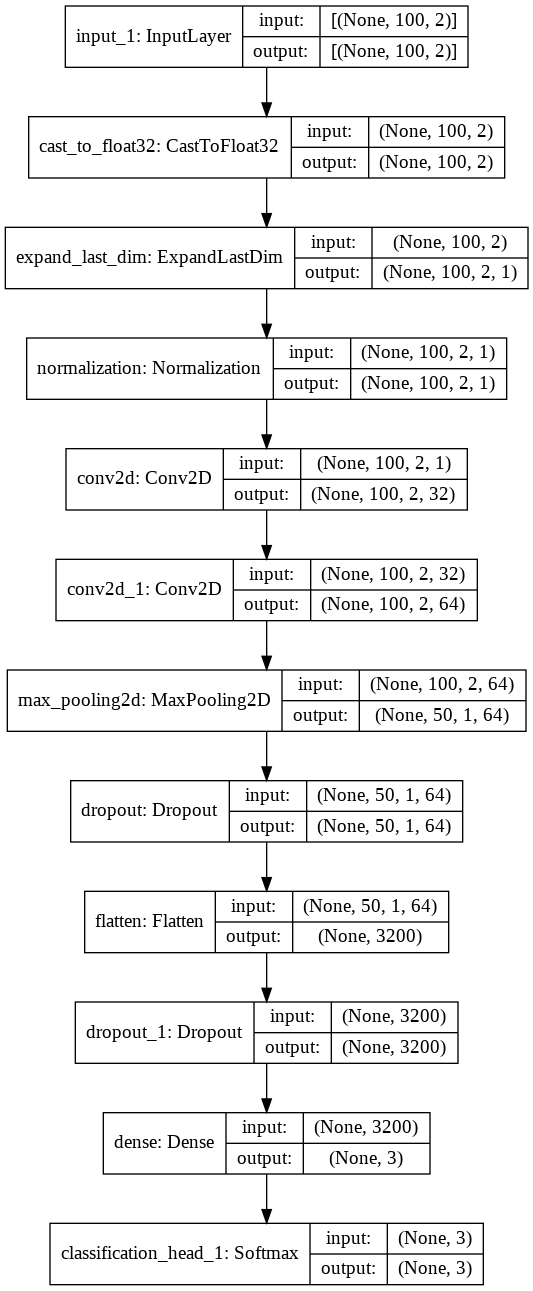

In [24]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=3_CNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [25]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 3s 6ms/step - loss: 0.9693 - accuracy: 0.4933 - val_loss: 0.9031 - val_accuracy: 0.3349
Epoch 2/25
375/375 [==============================] - 2s 6ms/step - loss: 0.6618 - accuracy: 0.6821 - val_loss: 0.2641 - val_accuracy: 0.9799
Epoch 3/25
375/375 [==============================] - 2s 6ms/step - loss: 0.4458 - accuracy: 0.8027 - val_loss: 0.0831 - val_accuracy: 0.9955
Epoch 4/25
375/375 [==============================] - 2s 6ms/step - loss: 0.3973 - accuracy: 0.8156 - val_loss: 0.0549 - val_accuracy: 0.9974
Epoch 5/25
375/375 [==============================] - 2s 6ms/step - loss: 0.3806 - accuracy: 0.8222 - val_loss: 0.0527 - val_accuracy: 0.9947
Epoch 6/25
375/375 [==============================] - 2s 6ms/step - loss: 0.3713 - accuracy: 0.8251 - val_loss: 0.0366 - val_accuracy: 0.9972
Epoch 7/25
375/375 [==============================] - 2s 6ms/step - loss: 0.3640 - accuracy: 0.8276 - val_loss: 0.0308 - val_accuracy: 0.9982
Epoch 

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.7910000085830688
SNR: -10 Accuracy: 0.7143333554267883
SNR: -5 Accuracy: 0.593999981880188
SNR: 0 Accuracy: 0.7796666622161865
SNR: 5 Accuracy: 0.9306666851043701
SNR: 10 Accuracy: 0.9900000095367432
SNR: 15 Accuracy: 0.9973333477973938
SNR: 20 Accuracy: 0.9983333349227905
SNR: 25 Accuracy: 0.9986666440963745
SNR: 30 Accuracy: 0.999666690826416


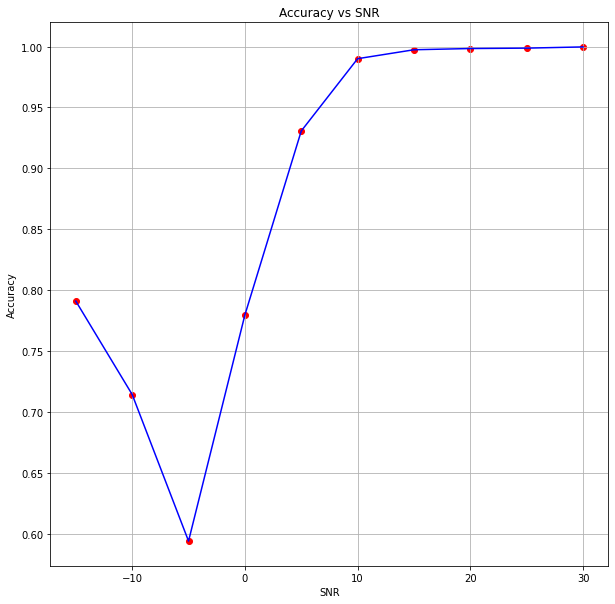

In [26]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=3_CNN.jpg")

Save Model

In [27]:
Rayleigh_Model.save("../Models/Rayleigh_L=3_CNN.h5")

## AutoML RNN Model for Rayleigh Channel of Channel-Length = 2

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier

Importing Data

In [28]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=2']

Creating Classifier


In [29]:
input_node = ak.Input()
rnn_node = ak.RNNBlock(return_sequences=True,
                       bidirectional=False,
                       layer_type='lstm')(input_node)
dense_node = ak.DenseBlock()(rnn_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RayleighClassifier = ak.AutoModel(inputs=input_node,
                                  outputs=output_node, 
                                  overwrite=True,
                                  max_trials=3)

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=256, validation_split=0.1)

Trial 3 Complete [00h 00m 21s]
val_loss: 0.023177243769168854

Best val_loss So Far: 0.021448751911520958
Total elapsed time: 00h 01m 24s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
469/469 [==============================] - 8s 11ms/step - loss: 1.0125 - accuracy: 0.3640
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.7560 - accuracy: 0.4035
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.6271 - accuracy: 0.6028
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.5335 - accuracy: 0.7986
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.7326 - accuracy: 0.6899


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100, 2)            40        
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 2)            40        
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                6432      
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0     

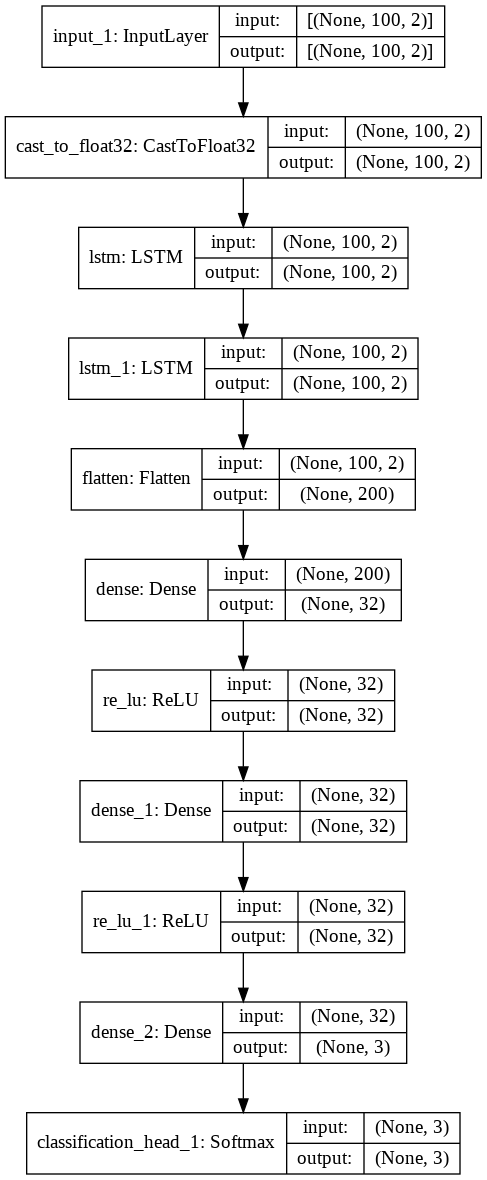

In [30]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=2_RNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [31]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 7s 13ms/step - loss: 0.3773 - accuracy: 0.8539 - val_loss: 0.1504 - val_accuracy: 0.9890
Epoch 2/25
375/375 [==============================] - 4s 11ms/step - loss: 0.3402 - accuracy: 0.8617 - val_loss: 0.1508 - val_accuracy: 0.9760
Epoch 3/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3292 - accuracy: 0.8642 - val_loss: 0.1195 - val_accuracy: 0.9853
Epoch 4/25
375/375 [==============================] - 4s 11ms/step - loss: 0.3166 - accuracy: 0.8653 - val_loss: 0.0718 - val_accuracy: 0.9927
Epoch 5/25
375/375 [==============================] - 4s 10ms/step - loss: 0.2967 - accuracy: 0.8688 - val_loss: 0.0810 - val_accuracy: 0.9874
Epoch 6/25
375/375 [==============================] - 4s 10ms/step - loss: 0.2816 - accuracy: 0.8739 - val_loss: 0.0850 - val_accuracy: 0.9794
Epoch 7/25
375/375 [==============================] - 4s 10ms/step - loss: 0.2715 - accuracy: 0.8756 - val_loss: 0.0769 - val_accuracy: 0.9825

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.659333348274231
SNR: -10 Accuracy: 0.706333339214325
SNR: -5 Accuracy: 0.925000011920929
SNR: 0 Accuracy: 0.8999999761581421
SNR: 5 Accuracy: 0.9943333268165588
SNR: 10 Accuracy: 0.9946666955947876
SNR: 15 Accuracy: 0.9903333187103271
SNR: 20 Accuracy: 0.9860000014305115
SNR: 25 Accuracy: 0.9896666407585144
SNR: 30 Accuracy: 0.9826666712760925


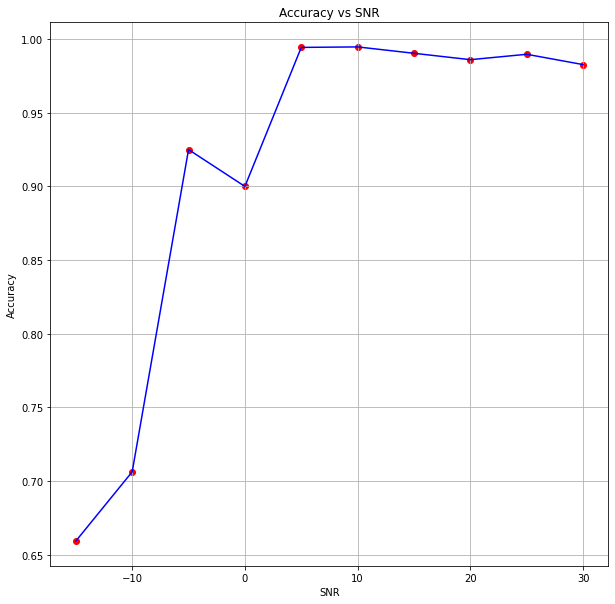

In [32]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=2_RNN.jpg")

Save Model

In [33]:
Rayleigh_Model.save("../Models/Rayleigh_L=2_RNN.h5")

## AutoML RNN Model for Rayleigh Channel of Channel-Length = 3

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier

Importing Data

In [34]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=3']

Creating Classifier


In [35]:
input_node = ak.Input()
rnn_node = ak.RNNBlock(return_sequences=True,
                       bidirectional=False,
                       layer_type='lstm')(input_node)
dense_node = ak.DenseBlock()(rnn_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RayleighClassifier = ak.AutoModel(inputs=input_node,
                                  outputs=output_node, 
                                  overwrite=True,
                                  max_trials=3)

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=256, validation_split=0.1)

Trial 3 Complete [00h 00m 37s]
val_loss: 0.7028200030326843

Best val_loss So Far: 0.4543541371822357
Total elapsed time: 00h 01m 44s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/5
469/469 [==============================] - 9s 14ms/step - loss: 1.3316 - accuracy: 0.3751
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.9511 - accuracy: 0.4536
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.8806 - accuracy: 0.5121
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.8966 - accuracy: 0.5183
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.8996 - accuracy: 0.5606


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100, 2)            40        
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 2)            40        
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              205824    
_________________________________________________________________
re_lu (ReLU)                 (None, 1024)              0     

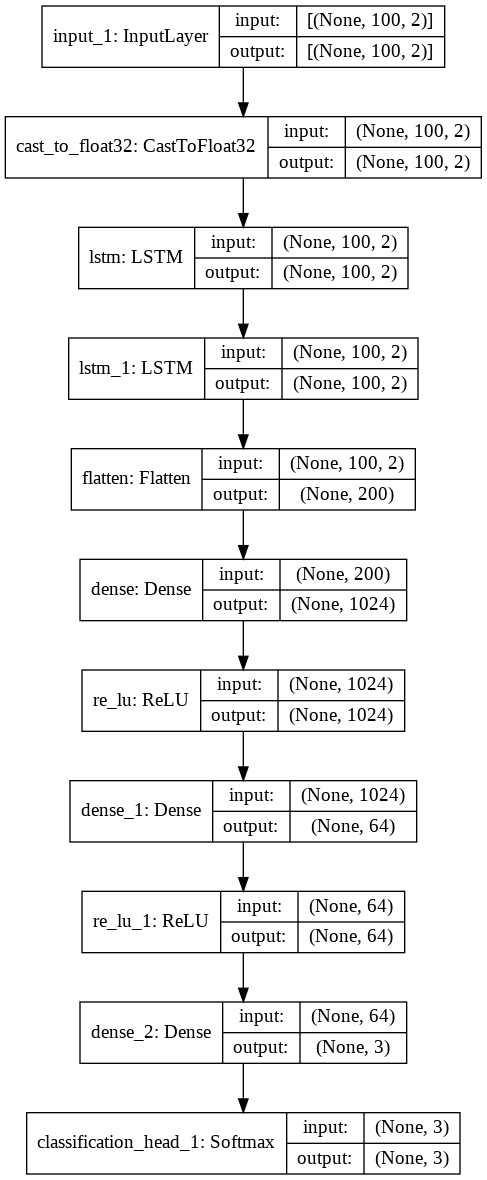

In [36]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=3_RNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [37]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 7s 13ms/step - loss: 0.7031 - accuracy: 0.6634 - val_loss: 0.4354 - val_accuracy: 0.8275
Epoch 2/25
375/375 [==============================] - 4s 11ms/step - loss: 0.6239 - accuracy: 0.6855 - val_loss: 0.3931 - val_accuracy: 0.8447
Epoch 3/25
375/375 [==============================] - 4s 11ms/step - loss: 0.5925 - accuracy: 0.6989 - val_loss: 0.3238 - val_accuracy: 0.8859
Epoch 4/25
375/375 [==============================] - 4s 11ms/step - loss: 0.5680 - accuracy: 0.7091 - val_loss: 0.2581 - val_accuracy: 0.9169
Epoch 5/25
375/375 [==============================] - 4s 11ms/step - loss: 0.5505 - accuracy: 0.7149 - val_loss: 0.3702 - val_accuracy: 0.8622
Epoch 6/25
375/375 [==============================] - 4s 11ms/step - loss: 0.5348 - accuracy: 0.7197 - val_loss: 0.3215 - val_accuracy: 0.8859
Epoch 7/25
375/375 [==============================] - 4s 11ms/step - loss: 0.5205 - accuracy: 0.7251 - val_loss: 0.2487 - val_accuracy: 0.9221

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.7563333511352539
SNR: -10 Accuracy: 0.7836666703224182
SNR: -5 Accuracy: 0.7009999752044678
SNR: 0 Accuracy: 0.8526666760444641
SNR: 5 Accuracy: 0.8550000190734863
SNR: 10 Accuracy: 0.8960000276565552
SNR: 15 Accuracy: 0.9593333601951599
SNR: 20 Accuracy: 0.9566666483879089
SNR: 25 Accuracy: 0.9556666612625122
SNR: 30 Accuracy: 0.95333331823349


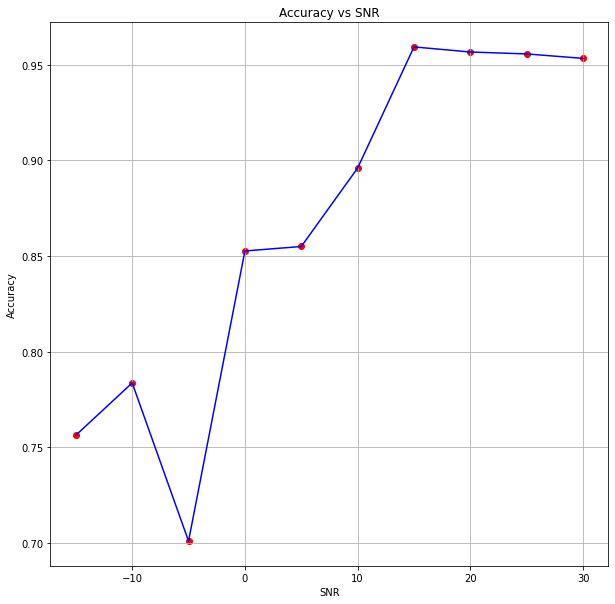

In [38]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=3_RNN.jpg")

Save Model

In [39]:
Rayleigh_Model.save("../Models/Rayleigh_L=3_RNN.h5")

## CNN Model for Rayleigh Data

This part of the code is written to verify the results with CNN.

### Creating a Model

In [40]:
def CreateCNNModel():
    tf.keras.backend.clear_session()
    In = Input(shape=(100,2))
    x = tf.keras.layers.Reshape((100,2,1))(In)
    x = Conv2D(filters=64,kernel_size=(3,1),activation='relu')(x)
    x = Conv2D(filters=16,kernel_size=(3,2),activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128,activation='relu')(x)
    Ou = Dense(3,activation='softmax')(x)

    model = Model(In,Ou)
    model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["acc"])

    return model

### Rayleigh Fading of Channel Length = 2

Importing Data

In [41]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=2']

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 100, 2, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 2, 64)         256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 1, 16)         6160      
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387   

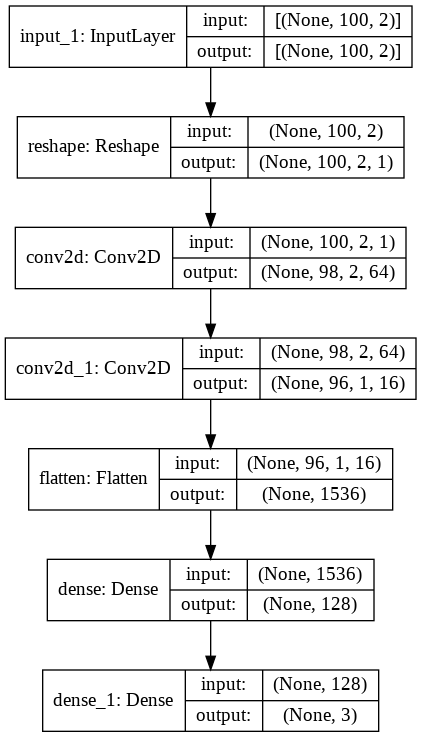

In [42]:
CNNModel = CreateCNNModel()
CNNModel.summary()
tf.keras.utils.plot_model(CNNModel, to_file='../Models/CNN_Rayleigh_Model_L=2.png', show_shapes=True,show_layer_names=True)

Training the Model

In [43]:
CNNModel.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 3s 5ms/step - loss: 0.5760 - acc: 0.7135 - val_loss: 0.0310 - val_acc: 0.9947
Epoch 2/25
375/375 [==============================] - 2s 5ms/step - loss: 0.1271 - acc: 0.9497 - val_loss: 0.0101 - val_acc: 0.9988
Epoch 3/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0920 - acc: 0.9616 - val_loss: 0.0209 - val_acc: 0.9935
Epoch 4/25
375/375 [==============================] - 2s 4ms/step - loss: 0.0750 - acc: 0.9686 - val_loss: 0.0066 - val_acc: 0.9987
Epoch 5/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0618 - acc: 0.9743 - val_loss: 0.0036 - val_acc: 0.9992
Epoch 6/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0453 - acc: 0.9820 - val_loss: 0.0061 - val_acc: 0.9983
Epoch 7/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0305 - acc: 0.9890 - val_loss: 0.0017 - val_acc: 0.9996
Epoch 8/25
375/375 [==============================] - 2s 5ms/step - loss: 0.

Evaluating the Model

Evaluating Model
SNR: -15 Accuracy: 0.8090000152587891
SNR: -10 Accuracy: 0.9396666884422302
SNR: -5 Accuracy: 0.9409999847412109
SNR: 0 Accuracy: 0.9793333411216736
SNR: 5 Accuracy: 0.9980000257492065
SNR: 10 Accuracy: 0.9993333220481873
SNR: 15 Accuracy: 1.0
SNR: 20 Accuracy: 1.0
SNR: 25 Accuracy: 1.0
SNR: 30 Accuracy: 1.0


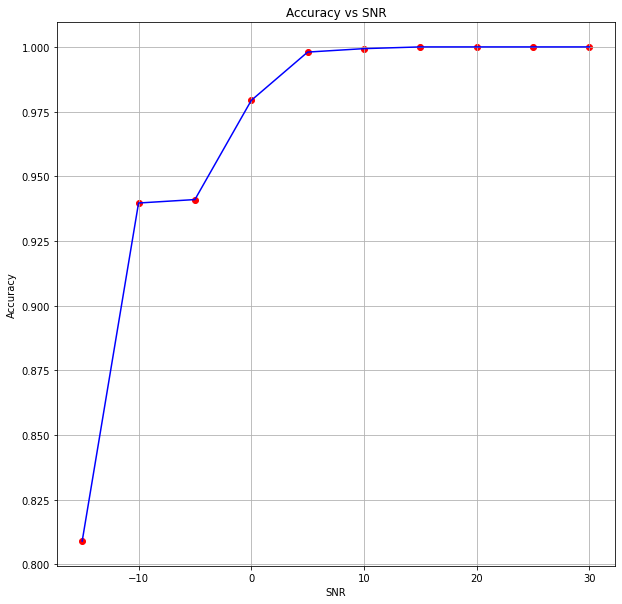

In [44]:
EvaluateData(CNNModel, X_Valid, y_Valid, "../Results/CNN_Rayleigh_Accuracy_L=2.jpg")

Save Model

In [45]:
CNNModel.save("../Models/CNN_Rayleigh_L=2.h5")

### Rayleigh Fading of Channel Length = 3

Importing Data

In [46]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=3']

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 100, 2, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 2, 64)         256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 1, 16)         6160      
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387   

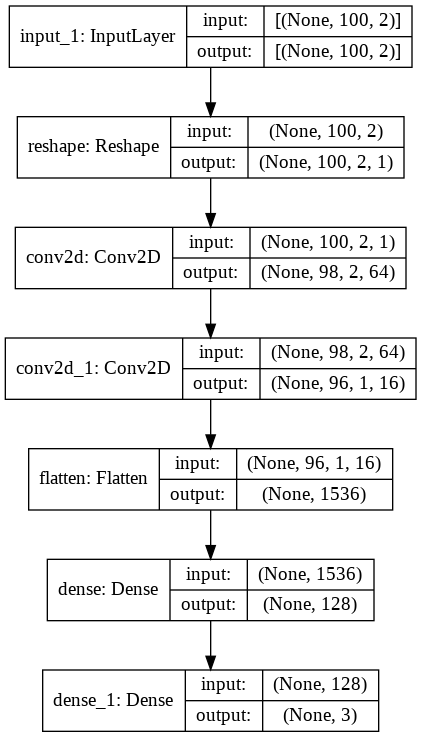

In [47]:
CNNModel = CreateCNNModel()
CNNModel.summary()
tf.keras.utils.plot_model(CNNModel, to_file='../Models/CNN_Rayleigh_Model_L=2.png', show_shapes=True,show_layer_names=True)

Training the Model

In [48]:
CNNModel.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 2s 5ms/step - loss: 0.8655 - acc: 0.6168 - val_loss: 0.1010 - val_acc: 0.9804
Epoch 2/25
375/375 [==============================] - 2s 5ms/step - loss: 0.3766 - acc: 0.8229 - val_loss: 0.0371 - val_acc: 0.9882
Epoch 3/25
375/375 [==============================] - 2s 5ms/step - loss: 0.3150 - acc: 0.8421 - val_loss: 0.0136 - val_acc: 0.9975
Epoch 4/25
375/375 [==============================] - 2s 5ms/step - loss: 0.2843 - acc: 0.8579 - val_loss: 0.0133 - val_acc: 0.9965
Epoch 5/25
375/375 [==============================] - 2s 5ms/step - loss: 0.2653 - acc: 0.8665 - val_loss: 0.0203 - val_acc: 0.9930
Epoch 6/25
375/375 [==============================] - 2s 5ms/step - loss: 0.2376 - acc: 0.8835 - val_loss: 0.0083 - val_acc: 0.9976
Epoch 7/25
375/375 [==============================] - 2s 5ms/step - loss: 0.2075 - acc: 0.9021 - val_loss: 0.0073 - val_acc: 0.9975
Epoch 8/25
375/375 [==============================] - 2s 5ms/step - loss: 0.

Evaluating the Model

Evaluating Model
SNR: -15 Accuracy: 0.6383333206176758
SNR: -10 Accuracy: 0.6353333592414856
SNR: -5 Accuracy: 0.6683333516120911
SNR: 0 Accuracy: 0.8036666512489319
SNR: 5 Accuracy: 0.9319999814033508
SNR: 10 Accuracy: 0.9800000190734863
SNR: 15 Accuracy: 0.9946666955947876
SNR: 20 Accuracy: 0.9953333139419556
SNR: 25 Accuracy: 0.996999979019165
SNR: 30 Accuracy: 0.9980000257492065


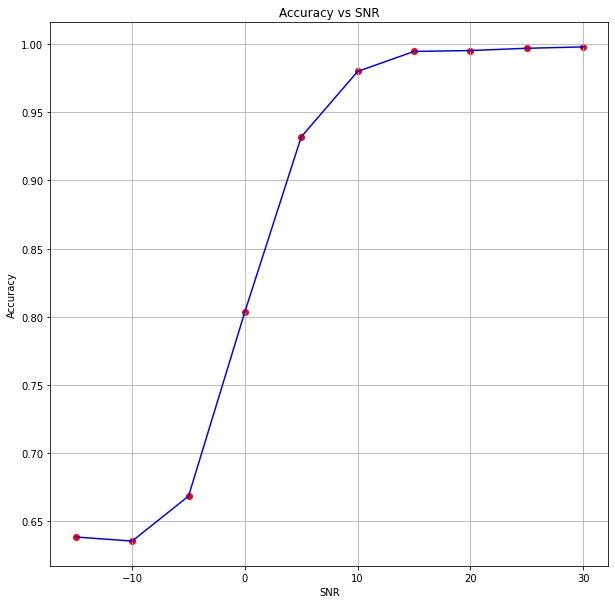

In [49]:
EvaluateData(CNNModel, X_Valid, y_Valid, "../Results/CNN_Rayleigh_Accuracy_L=3.jpg")

Save Model

In [50]:
CNNModel.save("../Models/CNN_Rayleigh_L=3.h5")

## Plot Results

### AWGN Models

Importing Data and Models

In [51]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('AWGN')

AWGN_MLP = tf.keras.models.load_model("../Models/AWGN_MLP.h5")
AWGN_CNN = tf.keras.models.load_model("../Models/AWGN_CNN.h5")

Plotting Results

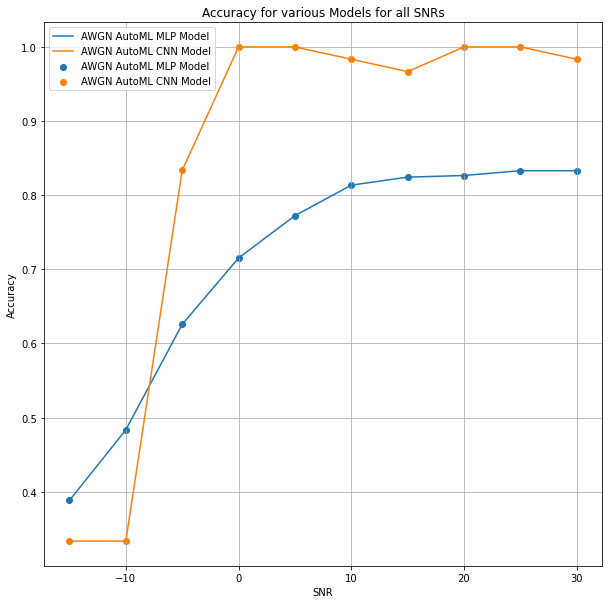

In [52]:
Models = {"AWGN AutoML MLP Model":AWGN_MLP, "AWGN AutoML CNN Model":AWGN_CNN}
PlotResults(Models, X_Valid, y_Valid, "../Results/AWGN_Accuracies.jpg")

### Rayleigh Models for L = 2


In [53]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=2)

Rayeligh_AutoMLCNN = tf.keras.models.load_model("../Models/Rayleigh_L=2_CNN.h5")
Rayeligh_AutoMLRNN = tf.keras.models.load_model("../Models/Rayleigh_L=2_RNN.h5")
Rayeligh_CNN = tf.keras.models.load_model("../Models/CNN_Rayleigh_L=2.h5")

Plotting Results

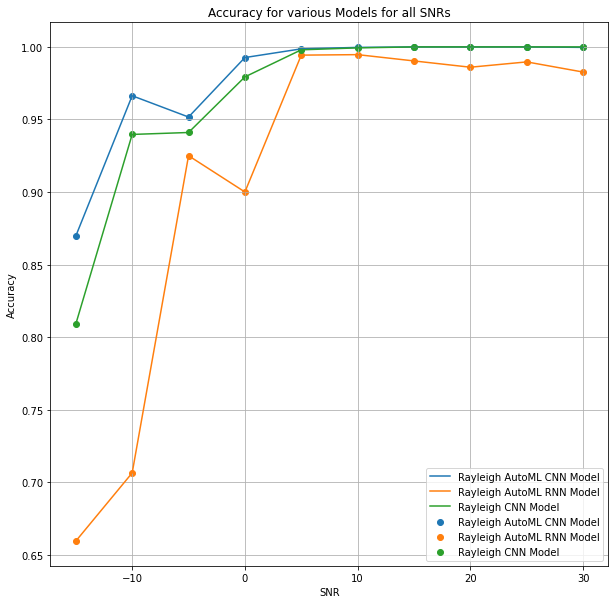

In [54]:
Models = {"Rayleigh AutoML CNN Model":Rayeligh_AutoMLCNN, "Rayleigh AutoML RNN Model":Rayeligh_AutoMLRNN, "Rayleigh CNN Model":Rayeligh_CNN}
PlotResults(Models, X_Valid, y_Valid, "../Results/Rayleigh_L=2_Accuracies.jpg")

### Rayleigh Models for L = 3


In [55]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=3)

Rayeligh_AutoMLCNN = tf.keras.models.load_model("../Models/Rayleigh_L=3_CNN.h5")
Rayeligh_AutoMLRNN = tf.keras.models.load_model("../Models/Rayleigh_L=3_RNN.h5")
Rayeligh_CNN = tf.keras.models.load_model("../Models/CNN_Rayleigh_L=3.h5")

Plotting Results

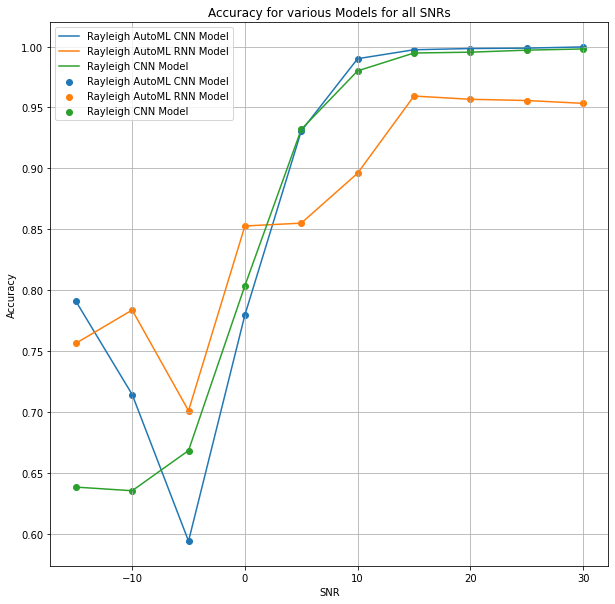

In [56]:
Models = {"Rayleigh AutoML CNN Model":Rayeligh_AutoMLCNN, "Rayleigh AutoML RNN Model":Rayeligh_AutoMLRNN, "Rayleigh CNN Model":Rayeligh_CNN}
PlotResults(Models, X_Valid, y_Valid, "../Results/Rayleigh_L=3_Accuracies.jpg")